# Phenotype Exploration
## The aim of this R notebook is to understand the distribution of the trait we will use for GWAS

# 1.  Initial setup steps

## 1a. Prepare environment
Loading packages and functions into R

In [1]:
library(ggplot2) #2 packages for making maps
library(maps)

Warning message:
“package ‘ggplot2’ was built under R version 3.6.1”
Warning message:
“package ‘maps’ was built under R version 3.6.1”


## 1b. Define input variables


In [2]:
pheno.file <- ("./data/subset_flowering_time_16.csv") # two columns giving ecotypeid and phenotype
accession.pos.file <- ("./data/accession_geo_locations.csv") # 5 columns: ecotypeid, collection location name, country, latitude, and longitude for all accession in the 1001 genomes dataset

# 2.  Distribution of phenotypic values
The trait we will work on together is the flowering time of 200 accessions grown at 16 degrees in a growth chamber (This is a subset of a much larger dataset: https://doi.org/10.1016/j.cell.2016.05.063).  The genotype is the number of days it takes for the first flower of a plant to open.  Also note that the values here are the means of multiple replications, which is why we can observe partial days in the data.

Is it sensible to use this data in a mixed linear model GWAS?  Is the trait quantitative?  Is the distribution likely to result in normally-distributed residuals in GWAS?

[1] 200   2

,ecotypeid,flowering_time_16
,<int>,<dbl>
1,770,72.25000
2,801,88.25000
3,991,106.75000
4,1062,68.25000
5,1367,88.75000
6,1853,69.33333


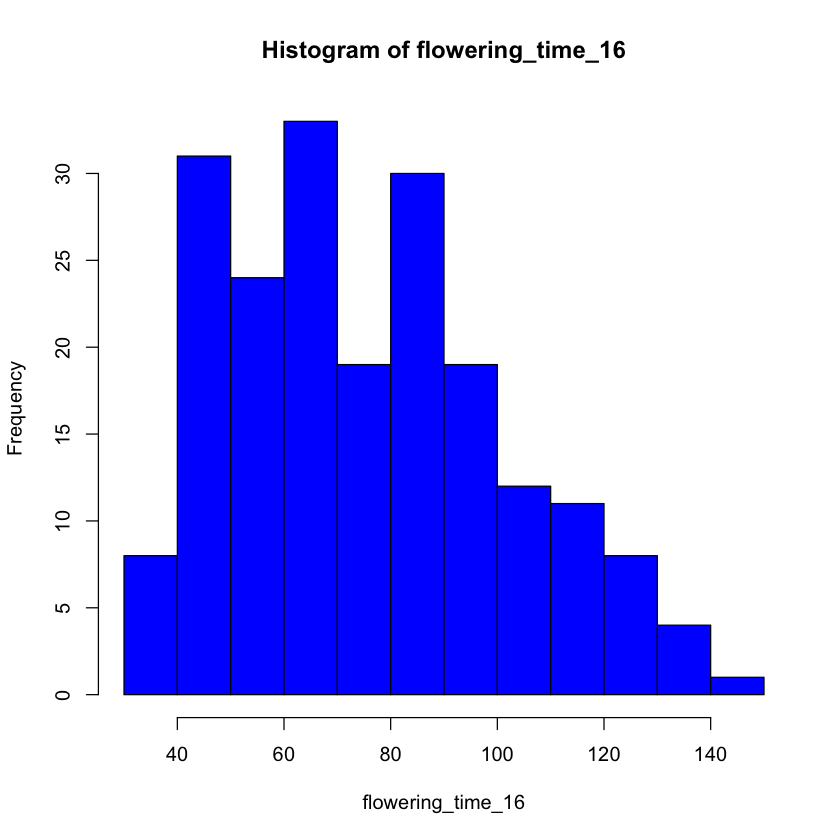

In [3]:
# load phenotype data
pheno <- read.csv(pheno.file)

# check format of data
dim(pheno)
head(pheno)

# make a histogram
pheno.name <- colnames(pheno)[2]
hist(pheno[,2],xlab=pheno.name, main=paste("Histogram of ",pheno.name, sep=""),col="blue")


Although the flowering time data doesn't have a beautiful normal distribution, we would consider it "close enough" to use in GWAS.

## 3.  Geographic distribution of trait values.
How much of a problem will population structure likely be?

In *Arabidopsis thaliana*, accessions that are geographically close tend to be more closely related than those that are further apart.  Another way of saying this is that population structure in the species is largely reflected in geography.  Strong geographic patterns in phenotypic values can therefore be a warning sign that population structure confounding will be high in a GWAS, so let's look at that relationship in our data.

In [4]:
# read in accession origin data
pos <- read.csv(accession.pos.file, stringsAsFactors=TRUE, header=TRUE)

# merge this data with the phenotype variable
pheno <- merge(pheno, pos)
head(pheno)


,ecotypeid,flowering_time_16,name,country,latitude,longitude
,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,801,88.25000,KYC-33,USA,37.91690,-84.46390
2,991,106.75000,Ale-Stenar-41-1,SWE,55.38226,14.05268
3,1062,68.25000,Brösarp-15-138,SWE,55.71670,14.13330
4,1853,69.33333,MNF-Pot-21,USA,43.59500,-86.26570
5,2016,69.75000,MNF-Pin-39,USA,43.53560,-86.17880
6,4807,87.50000,UKSW06-207,UK,50.40000,-4.90000


Warning message:
“Removed 28 rows containing missing values (geom_point).”


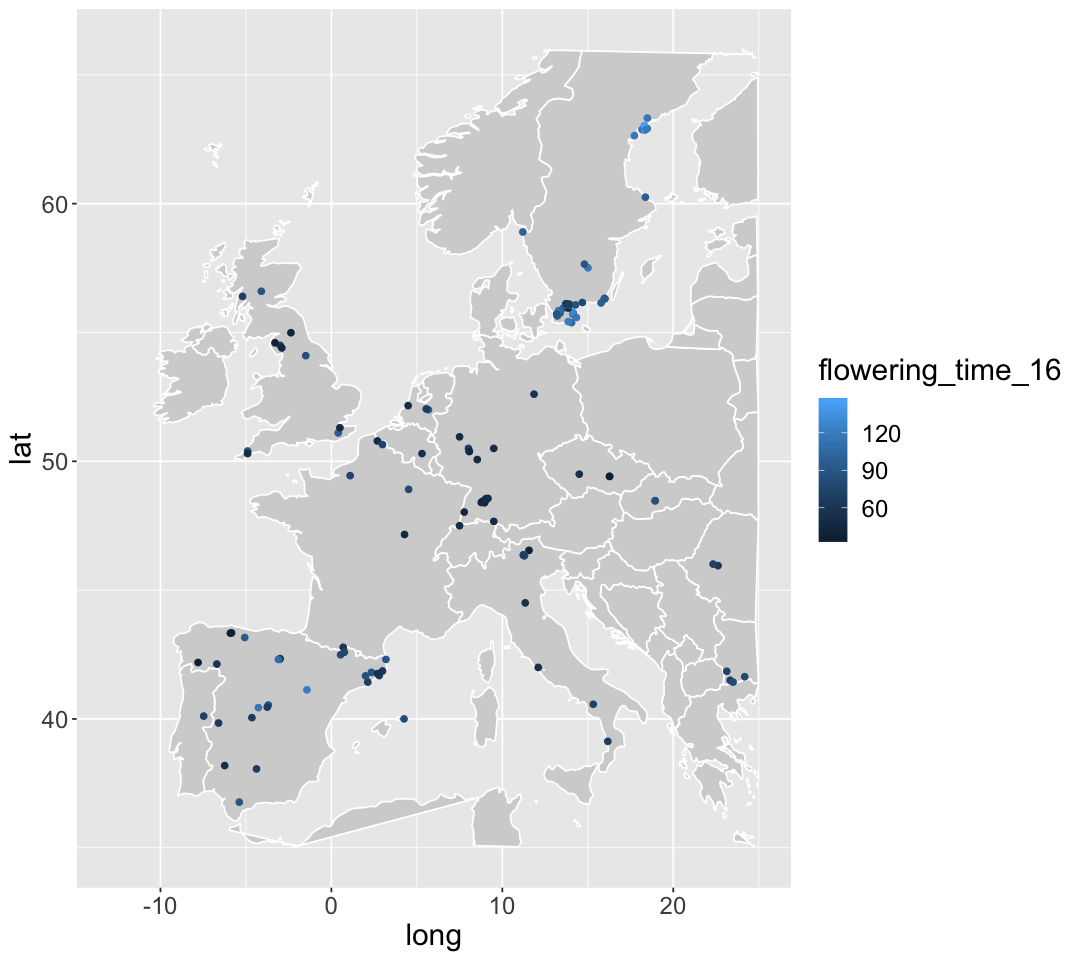

In [5]:
world_map <- map_data("world")
europe_map <- ggplot(world_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill="lightgray", colour = "white") +
  xlim(-13,25) +
  ylim(35, 66) +
  geom_point(data=pheno, aes(x = longitude, y=latitude, colour=get(pheno.name)),inherit.aes = FALSE) +
  labs(colour=pheno.name) +
  theme(text = element_text(size = 18))
 
options(repr.plot.width=9, repr.plot.height=8)
europe_map

 ### Given the strong geographic pattern in flowering time, I would predict that we will have very strong population structure confounding in our GWAS!  Let's run it and see.
 ## Let's move on to 2_GWAS.ipynb where we will use this phenotype for GWAS.